<div><img src = "http://dolphin-public.oss-cn-shanghai.aliyuncs.com/img/marry/ml/1508.png", width = 750/>

## 参数

In [ ]:
# 函数输出打分
output_score = list(range(12))
output_score

In [2]:
# 正确分类
y = [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1]
len(y)

12

In [3]:
# 设定p，集合中正例比例，这里范围为0-100，所以还要除以100
p = list(range(0,101,10))
p = [i/100 for i in p]
p

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [4]:
# 设定代价
c01 = 3
c02 = 2

## 一个阈值

In [5]:
# 判断阈值
theta = 6.5

In [6]:
# 函数输出判断
def calculate_output_result(output_score,theta):
    output_result = []
    for i in range(len(output_score)):
        if output_score[i] < theta:
            output_result.append(0)
        else:
            output_result.append(1)
    return output_result 
output_result = calculate_output_result(output_score,theta)
output_result

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [7]:
# 统计正例和反例的个数
import pandas as pd
def calculate_m_positive_negative(y):
    result = pd.value_counts(y)
    m_positive = result[1]
    m_negative = result[0]
    return m_positive, m_negative
m_positive, m_negative = calculate_m_positive_negative(y)
print(m_positive, m_negative)

6 6



|类型|预测为5|预测非5|
|----|----|----|
|m_positive=6|con1|con2|
|m_negative=6|con3|con4|
|m=12|-|-|

In [8]:
# 计算混淆矩阵的圈1，圈2，圈3，圈4
def calculate_confusion(y,output_result):
    con1 = 0
    con2 = 0
    con3 = 0
    con4 = 0
    for i in range(len(y)):
        if y [i] == 1:
            if y[i] == output_result[i]:
                con1 += 1
            else:
                con2 += 1
        else:
            if y[i] == output_result[i]:
                con4 += 1
            else:
                con3 += 1
    return con1, con2, con3, con4
con1, con2, con3, con4 = calculate_confusion(y,output_result)
print(con1, con2, con3, con4)

4 2 1 5



|类型|预测为5|预测非5|
|----|----|----|
|m_positive=6|con1=4|con2=2|
|m_negative=6|con3=1|con4=5|
|m=12|-|-|

In [9]:
# 求几个比例，保留四位小数
def calculate_FNR_FPR(con1,con2,con3,con4):
    FNR = round(con2/(con1+con2), 4)
    FPR = round(con3/(con3+con4),4)
    return FNR, FPR
FNR, FPR = calculate_FNR_FPR(con1,con2,con3,con4)
print(FNR, FPR)

0.3333 0.1667


In [10]:
# 正概率代价
def calculate_Pcost(p, c01, c02):
    Pcosts = []
    for i in range(len(p)):
        Pcost = round((p[i]*c01)/(p[i]*c01+(1-p[i])*c02),4)
        Pcosts.append(Pcost)
    return Pcosts
Pcosts  = calculate_Pcost(p, c01, c02)
Pcosts

[0.0, 0.1429, 0.2727, 0.3913, 0.5, 0.6, 0.6923, 0.7778, 0.8571, 0.931, 1.0]

In [11]:
# 归一化总概率
def calculate_cost_norm(p, c01, c02, FNR, FPR):
    costs_norm = []
    for i in range(len(p)):
        cost_norm = round((FNR*(p[i]*c01)+FPR*(1-p[i])*c02)/(p[i]*c01+(1-p[i])*c02),4)
        costs_norm.append(cost_norm)
    return costs_norm
costs_norm = calculate_cost_norm(p, c01, c02, FNR, FPR)
costs_norm

[0.1667,
 0.1905,
 0.2121,
 0.2319,
 0.25,
 0.2667,
 0.282,
 0.2963,
 0.3095,
 0.3218,
 0.3333]

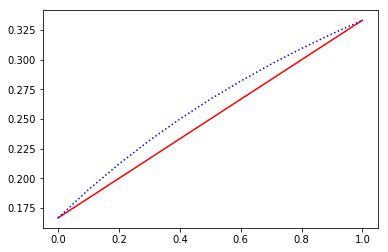

In [13]:
# 画出图像
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_lines(X, Y, color):
    plt.plot(X, Y, color)
    return
plot_lines(Pcosts, costs_norm,'r')
plot_lines(p, costs_norm, "b:")
plt.show()

这里可以看出，如果直接使用p作为x轴，则图像为一条曲线

而使用归一化的正例概率代价，则图像为一条直线

显然线性关系更利于我们分析

故之后我们都只讨论以正例概率代价为x轴的图像

## 多个theta

In [14]:
# 生成theta
thetas = list(range(12))
thetas = [i+0.5 for i in thetas]
thetas

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]

In [15]:
# 定义计算每个theta对应的点的函数，并存在列表里
def calculate_Pcost_cost_norm(thetas, output_score, y, calculate_Pcost, calculate_cost_norm):
    Pcosts_n = []
    costs_norm_n = []
    theta_FPR_FNR = {}
    for i in range(len(thetas)):
        theta = thetas[i]
        
        # 计算输出结果
        output_result = calculate_output_result(output_score,theta)
        # print(output_result)

        # 统计正例反例个数
        m_positive, m_negative = calculate_m_positive_negative(y)
        
        # 计算混淆矩阵
        con1, con2, con3, con4 = calculate_confusion(y,output_result)
        # print(con1, con2, con3, con4)
        
        # 求 FNR FPR
        FNR, FPR = calculate_FNR_FPR(con1,con2,con3,con4)
        theta_FPR_FNR[theta]=[FNR, FPR]
        
        # 正概率代价
        Pcosts  = calculate_Pcost(p, c01, c02)
        Pcosts_n.append(Pcosts)
        
        # 归一化总概率
        costs_norm = calculate_cost_norm(p, c01, c02, FNR, FPR)
        costs_norm_n.append(costs_norm)
        
    return Pcosts_n, costs_norm_n, theta_FPR_FNR

In [16]:
# 调用函数计算每个theta对应的点
Pcosts_n, costs_norm_n, theta_FPR_FNR  = calculate_Pcost_cost_norm(thetas, output_score,y, calculate_Pcost, calculate_cost_norm)

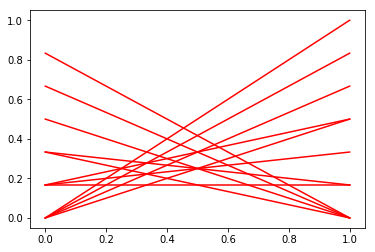

In [17]:
for i in range(len(Pcosts_n)):
    plot_lines(Pcosts_n[i], costs_norm_n[i],'r')
plt.show()

In [18]:
# 查看theta与对应的FPR，FNR
theta_FPR_FNR

{0.5: [0.0, 0.8333],
 1.5: [0.0, 0.6667],
 2.5: [0.0, 0.5],
 3.5: [0.0, 0.3333],
 4.5: [0.1667, 0.3333],
 5.5: [0.1667, 0.1667],
 6.5: [0.3333, 0.1667],
 7.5: [0.5, 0.1667],
 8.5: [0.5, 0.0],
 9.5: [0.6667, 0.0],
 10.5: [0.8333, 0.0],
 11.5: [1.0, 0.0]}

## 为什么要归一化

如果不归一化会怎么样

In [20]:
# 重新定义计算函数

# 正概率代价
def calculate_Pcost_2(p, c01, c02):
    Pcosts = []
    for i in range(len(p)):
        Pcost = round(p[i]*c01, 4)
        Pcosts.append(Pcost)
    return Pcosts

# 归一化总概率
def calculate_cost_norm_2(p, c01, c02, FNR, FPR):
    costs_norm = []
    for i in range(len(p)):
        cost_norm = round(FNR*(p[i]*c01)+FPR*(1-p[i])*c02,4)
        costs_norm.append(cost_norm)
    return costs_norm

In [21]:
# 调用函数计算每个theta对应的点
Pcosts_n, costs_norm_n, theta_FPR_FNR  = calculate_Pcost_cost_norm(thetas, output_score,y, calculate_Pcost_2, calculate_cost_norm_2)

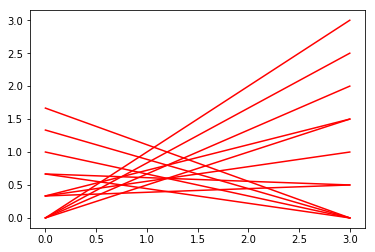

In [22]:
for i in range(len(Pcosts_n)):
    plot_lines(Pcosts_n[i], costs_norm_n[i],'r')
plt.show()

其纵轴左边，右边，横轴单位不统一，受c01和c02的影响

当c01，c02改变时，不方便比较